<a href="https://colab.research.google.com/github/banggeunho/nlp_exercise/blob/master/RNN_2022_08_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN 직접 구현
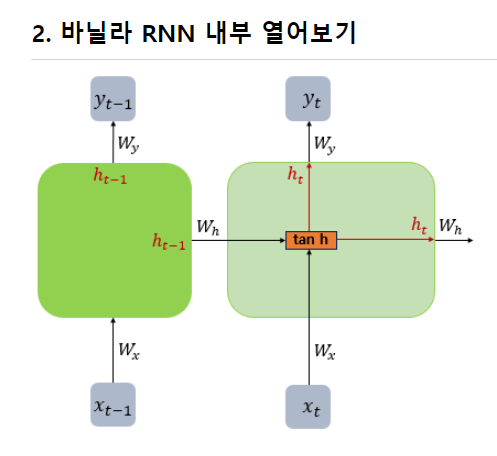
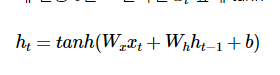

In [ ]:
import numpy as np

timesteps = 10
input_size = 4
hidden_size = 8

inputs = np.random.random((timesteps, input_size))
hidden_state_t = np.zeros((hidden_size,))

Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.65561297 0.84275573 0.83057582 0.83452184 0.77428007 0.92567259
  0.9509507  0.8972495 ]
 [0.99956128 0.999925   0.9995511  0.99960121 0.998677   0.99997235
  0.99939961 0.9996033 ]
 [0.99977542 0.9999859  0.99961851 0.99988648 0.99961383 0.99999868
  0.99970739 0.99987852]
 [0.99991334 0.99998795 0.99990314 0.99991275 0.99971272 0.99999761
  0.99989494 0.99995045]
 [0.99987941 0.99998653 0.99980545 0.99987774 0.99961785 0.9999975
  0.99978182 0.99992702]
 [0.99969581 0.99996801 0.99977969 0.99975514 0.99919537 0.99999488
  0.99954358 0.99960519]
 [0.99987494 0.9999917  0.99988101 0.99995783 0.99978705 0.99999911
  0.99987929 0.99990375]
 [0.99954254 0.99996756 0.9995888  0.99974687 0.99916533 0.99999664
  0.9993776  0.99949622]
 [0.99984117 0.99998426 0.99982714 0.99987855 0.99954133 0.99999713
  0.99970335 0.9998361 ]
 [0.99986253 0.99999155 0.99982674 0.99995455 0.99981776 0.99999939
  0.99991649 0.99994877]]

# Torch에서 제공하는 RNN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size, hidden_size, batch_first=True)
outputs, _status = cell(inputs)
print(outputs.shape) # 모든 time-step의 hidden_state
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


In [ ]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)
outputs, _status = cell(inputs)
print(outputs.shape) # 모든 time-step의 hidden_state
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [ ]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)
outputs, _status = cell(inputs)
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


# LSTM


In [ ]:
nn.LSTM(input_dim, hidden_size, batch_fisrt=True)  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

['!', 'a', 'e', 'l', 'p']
문자 집합의 크기 : 5


In [ ]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [ ]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}
[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [ ]:
# 배치 차원 추가 -> RNN은 기본적으로 3차원 텐서를 입력 받습니다.
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [ ]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data] # np.eye(size) -> 원핫벡터 만들기
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [ ]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [ ]:
net = Net(input_size, hidden_size, output_size)

In [ ]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [ ]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [ ]:
import torch.optim as optim
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [ ]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.5890038013458252 prediction:  [[3 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  lpppp
1 loss:  1.3977162837982178 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
2 loss:  1.2782354354858398 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
3 loss:  1.1340086460113525 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
4 loss:  0.9301871061325073 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
5 loss:  0.7169126868247986 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
6 loss:  0.5184742212295532 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.3757351040840149 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.264345645904541 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.19731785356998444 prediction:  [[4 4 3 2 0]] 

# 문자 단위 RNN (Many to Many) - 더 많은 데이터

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [ ]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

dic_size = len(char_dic)
print(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

{'y': 0, 'u': 1, 'w': 2, 'r': 3, 't': 4, "'": 5, 'o': 6, 'f': 7, 'b': 8, 'd': 9, 'g': 10, 'k': 11, 'i': 12, 'e': 13, ' ': 14, 'l': 15, 'p': 16, 'h': 17, 's': 18, 'a': 19, 'c': 20, 'm': 21, ',': 22, '.': 23, 'n': 24}
문자 집합의 크기 : 25


In [ ]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [ ]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [ ]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

print(x_data)
print(X[0])

[[12, 7, 14, 0, 6, 1, 14, 2, 19, 24], [7, 14, 0, 6, 1, 14, 2, 19, 24, 4], [14, 0, 6, 1, 14, 2, 19, 24, 4, 14], [0, 6, 1, 14, 2, 19, 24, 4, 14, 4], [6, 1, 14, 2, 19, 24, 4, 14, 4, 6], [1, 14, 2, 19, 24, 4, 14, 4, 6, 14], [14, 2, 19, 24, 4, 14, 4, 6, 14, 8], [2, 19, 24, 4, 14, 4, 6, 14, 8, 1], [19, 24, 4, 14, 4, 6, 14, 8, 1, 12], [24, 4, 14, 4, 6, 14, 8, 1, 12, 15], [4, 14, 4, 6, 14, 8, 1, 12, 15, 9], [14, 4, 6, 14, 8, 1, 12, 15, 9, 14], [4, 6, 14, 8, 1, 12, 15, 9, 14, 19], [6, 14, 8, 1, 12, 15, 9, 14, 19, 14], [14, 8, 1, 12, 15, 9, 14, 19, 14, 18], [8, 1, 12, 15, 9, 14, 19, 14, 18, 17], [1, 12, 15, 9, 14, 19, 14, 18, 17, 12], [12, 15, 9, 14, 19, 14, 18, 17, 12, 16], [15, 9, 14, 19, 14, 18, 17, 12, 16, 22], [9, 14, 19, 14, 18, 17, 12, 16, 22, 14], [14, 19, 14, 18, 17, 12, 16, 22, 14, 9], [19, 14, 18, 17, 12, 16, 22, 14, 9, 6], [14, 18, 17, 12, 16, 22, 14, 9, 6, 24], [18, 17, 12, 16, 22, 14, 9, 6, 24, 5], [17, 12, 16, 22, 14, 9, 6, 24, 5, 4], [12, 16, 22, 14, 9, 6, 24, 5, 4, 14], [16, 22,

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [ ]:
net1 = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)
outputs = net1(X)
print(X.shape)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])
torch.Size([170, 10, 25])


In [ ]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

 t                                                                                                                                                                                 
 ,                                                                                                                                                                                 
uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu
utttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt
 tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt
 ttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt